# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: Luca Erbí

## Imports

Please do **not** import any other library.

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [189]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [190]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [191]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [192]:
regions = list(df.region.unique())

In [193]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [194]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [195]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [196]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

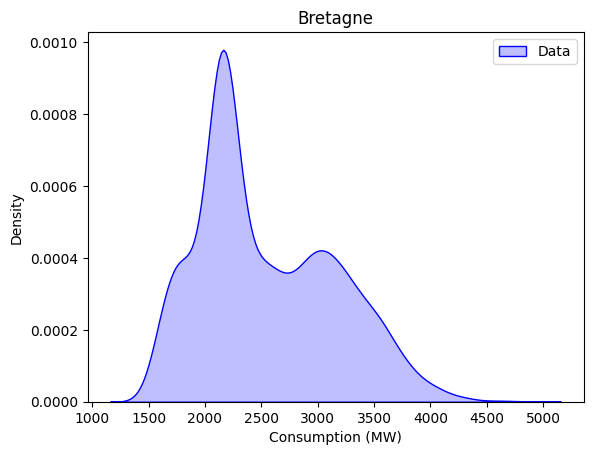

In [197]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

1.1 
$$
E(\hat \mu) = E(\frac 1 n \sum_{i=1}^n x_i) = \frac 1 n n  E( x_i) = \mu
$$
1.2
$$
E(\hat \sigma^2) = E(\sum_{i=1}^n \frac {(x_i-\hat \mu)^2} {n-1} ) = \frac {1} {n-1} E( \sum_{i=1}^n (x_i^2-2\hat \mu x_i +\hat \mu^2)) = 
\frac {1} {n-1} E( \sum_{i=1}^n x_i^2-2n\hat \mu\frac {\sum_{i=1}^n x_i} {n} + n\hat \mu^2) = \frac {1} {n-1} (\sum_{i=1}^n  E( x_i^2) -nE(\hat \mu^2)) 
$$
Then, we have that $E(x_i^2) = \sigma^2+\mu^2$ cause of the Gaussian distribution. Instead for the expression of $E(\hat \mu^2)$ we get,
$$
E(\hat \mu^2)=Var(\hat \mu) + E(\hat \mu)^2 = \frac 1 {n^2} Var(\sum_{i=1}^n x_i) + \frac 1 n E(\sum_{i=1}^n x_i)^2 = \frac {\sigma^2} {n} + \mu^2
$$
To finalise,
$$
E(\hat \sigma^2) = \frac {1} {n-1} (\sum_{i=1}^n  E( x_i^2) -nE(\hat \mu^2)) = \frac {1} {n-1} (n\sigma^2+n\mu^2 - n\frac {\sigma^2} n - n\mu^2) = \sigma^2 
$$

Your answer:

2. Give the values obtained for the mean and the standard deviation using these estimators.

In [198]:
def mean_stddev_est(data):
    n = len(data)
    mu = 1/n * data["consumption"].sum()
    sigma_sq = 1/(n-1) * ((data["consumption"] - mu)**2).sum()
    std_dev = np.sqrt(sigma_sq)
    return mu, std_dev

mu, std_dev = mean_stddev_est(df_region)
print("mu: " + str(mu) +", sigma^2: " + str(std_dev))

mu: 2546.536155666579, sigma^2: 604.9429842099315


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [199]:
def gauss_model(data):
    mu, std_dev = mean_stddev_est(data)
    newdata = pd.DataFrame(norm.rvs(loc = mu, scale = std_dev, size = len(data)), columns=["consumption"])
    return newdata

df_generated = gauss_model(df_region)
df_generated

,consumption
0,1499.696688
1,1666.107459
2,2997.256610
3,2975.086991
4,3353.501269
...,...
3798,3846.505133
3799,1823.472331
3800,3737.141621
3801,1944.371872


4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

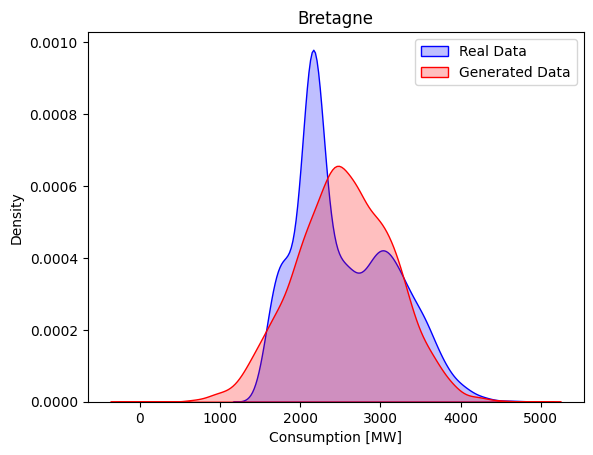

In [200]:
def plot_kdes(df_or, df_gen, title):
    sns.kdeplot(data=df_or["consumption"], label="Real Data", color="blue", fill=True)
    sns.kdeplot(data=df_gen["consumption"], label="Generated Data", color="red", fill=True)
    plt.title(title)
    plt.xlabel("Consumption [MW]")
    plt.ylabel("Density")
    plt.legend()

    plt.show()
    
plot_kdes(df_region, df_generated, region)

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

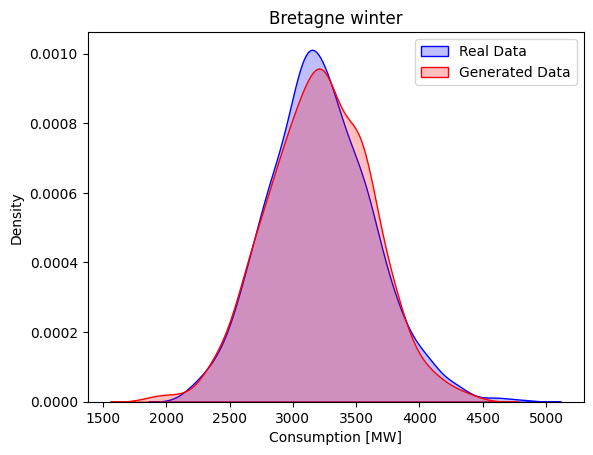

In [201]:
def winter_data(data):
    data_copy = data.copy()
    
    data_copy['date'] = pd.to_datetime(data_copy['date'])
    winter_datas = data_copy[((data_copy.date.dt.month == 12) & (data_copy.date.dt.day >= 22)) | (data_copy.date.dt.month <= 2) | ((data_copy.date.dt.month == 3) & (data_copy.date.dt.day <= 21))]
    return winter_datas

def winter_plots(data):
    winter_datas = winter_data(data)
    mu_winter, std_dev_winter = mean_stddev_est(winter_datas)

    # Generate data for winter
    df_generated_winter = gauss_model(winter_datas)
    plot_kdes(winter_datas, df_generated_winter, region+" winter")
    
winter_plots(df_region)

6. In which case the Gaussian model seems more appropriate?

The Gaussian model seems to be more appropriate in the second case, this is caused by the fact that in winter the power consumption is unimodal distribuited while, during the year, the distribution looks more like a multivariate gaussian distribution.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser:

First, we can remember that the integral of the module of an arbitrary function must be :
$ \int |h(x)| \mathrm dx \geq 0$.

 So $d(f, g)$ is greater or equal to zero and bounded is we considered that $f$ and $g$ are Lebesgue integrable.

* $d(f,g)=0$ if and only if $f=g$.

In the case that $d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx = 0$, We know that the integrand must be positive, then $|f(x) - g(x)| = 0$ for almost every point(for all x, except possibly a set of Lebesgue measure zero).

* $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

If $f$ and $g$ have disjoint supports If then $\int |f−g|=\int|f|+\int|g|$, integrating over the support of the two pdf functions, we van obtain 2. So, 
$d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx  = 1$. We can say that $d(f,g) \in [0,1]$.

2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [207]:
def diss_fun(fx, gx):
    return 0.5 * np.sum(np.abs((fx - gx)))

def dissimilarity(data, data_generated):
    mu, sigma = mean_stddev_est(data)
    consumptions_real = data["consumption"]
    consumptions_generated = data_generated["consumption"]
    
    kde_real = gaussian_kde(consumptions_real)
    kde_generated = gaussian_kde(consumptions_generated)
    
    data_points = np.linspace(min(consumptions_real.min(), consumptions_generated.min()), 
                             max(consumptions_real.max(), consumptions_generated.max()), 
                             num=5000)
    
    pdf_real = kde_real.pdf(data_points)
    pdf_generated = kde_generated.pdf(data_points)
    
    return diss_fun(pdf_real, pdf_generated)


print("Dissimilarity measure: " + str(dissimilarity(df_region, df_generated)))

TypeError: only size-1 arrays can be converted to Python scalars

3. Do the same for the region Bretagne in winter and check your conclusion of part A.

4. Do the same for all regions. Give the result as a single dataframe.

5. Which region is best fitted by a Gaussian model in winter?

6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$ MW. We assume a Gaussian prior on $\mu$ with mean $ \mu_0=3500$ MW and standard deviation $ \sigma_0=500$ MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:

1. Prior $ \pi_0(\mu)\sim \mathcal{N}(\mu_0, \sigma_0^2)=\frac{1}{\sqrt{2\pi\sigma_0^2}} e^{-\frac{1}{2\sigma_0^2}(\mu-\mu_0)^2} $, 
Model $\mathbb{P}(x|\mu)=\prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2}$ both Gaussians. The posterior distribution is given by Bayes' theorem: $$\pi(\mu|x)\propto\pi_0(\mu) \mathbb{P}(x|\mu) \propto e^{-\frac{1}{2\sigma_0^2}(\mu-\mu_0)^2}e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2} \propto e^{-\frac{1}{2\sigma_0^2}(\mu^2-2\mu\mu_0)}e^{-\frac{1}{2\sigma^2}(n\mu^2-2\mu S)}=e^{-\frac{1}{2}(\mu^2(\frac{n}{\sigma^2}+\frac{1}{\sigma_0^2})-2\mu(\frac{S}{\sigma^2}+\frac{\mu_0}{\sigma_0^2}))}$$
where $ S=\sum_{i=1}^n x_i $ . From this expression we can get the parameters of the posterior $\mathcal{N}(\mu_1, \sigma_1^2)$ :
* $\sigma_1^2=\frac{\sigma^2\sigma_0^2}{n\sigma_0^2+\sigma^2}$
* $\mu_1=\frac{\frac{S}{\sigma^2}+\frac{\mu_0}{\sigma_0^2}}{\frac{n}{\sigma^2}+\frac{1}{\sigma_0}} = \frac{S\sigma_0^2 + \mu_0\sigma^2}{n\sigma_0^2 + \sigma^2}$

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [110]:
sigma = 400 
mu_0 = 3500  
sigma_0 = 500  

df_region_winter = winter_data(df_region)

years = list(range(2013, 2024))

sigma_1_squared = []
mu_1 = []
ns = []

# Calculate parameters for each year
for year in years:
    S = df_region_winter[df_region_winter.date.dt.year == year]["consumption"].sum() 
    n = df_region_winter[df_region_winter.date.dt.year == year]["consumption"].size 

    sigma_1_squared_val = (sigma ** 2 * sigma_0 ** 2) / (n * sigma_0 ** 2 + sigma ** 2)
    mu_1_val = (S * sigma_0 ** 2 + mu_0 * sigma ** 2) / (n * sigma_0 ** 2 + sigma ** 2)

    sigma_1_squared.append(sigma_1_squared_val)
    mu_1.append(mu_1_val)
    ns.append(n)

parameters_df = pd.DataFrame({
    'Year': years,
    'Mean': mu_1,
    'Var': sigma_1_squared,
})

print(parameters_df)


    Year         Mean          Var
0   2013  3343.413504  1765.225066
1   2014  3118.424537  1765.225066
2   2015  3167.398500  1765.225066
3   2016  3207.507639  1745.962462
4   2017  3251.224625  1765.225066
5   2018  3315.081642  1765.225066
6   2019  3195.200794  1765.225066
7   2020  3145.504147  1745.962462
8   2021  3341.946161  1765.225066
9   2022  3165.081642  1765.225066
10  2023  3117.547123  1984.126984


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

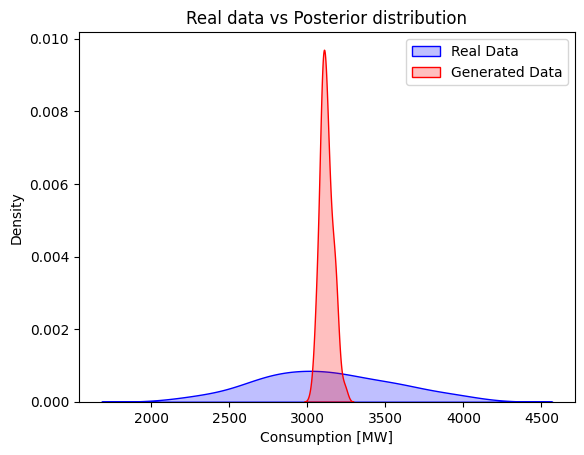

In [111]:
df_posterior = np.random.normal(
    loc=parameters_df.loc[parameters_df['Year'] == 2023, "Mean"].values[0],
    scale=np.sqrt(parameters_df.loc[parameters_df['Year'] == 2023, "Var"].values[0]),
    size=ns[10] 
)

df_posterior = pd.DataFrame(df_posterior, columns=["consumption"])
plot_kdes(df_region_winter[df_region_winter.date.dt.year == 2023], df_posterior, "Real data vs Posterior distribution")

4. Discuss the results, comparing to those obtained in part A.

Your answer:

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer: The statistical test proposed will be a simple-hypotesis test where: 
$$
H_0: \theta_0 = 400 \quad \text{against} \quad H_1: \theta_1 = 500
$$
Since the power consumption is Gaussian in winter we can write the likelihood ratio as follow:
$$
\frac{p_1(x)}{p_0(x)} \propto e^{\frac{S}{2}(\frac{1}{\theta_0^2}-\frac{1}{\theta_1^2})} \text{ with } 
S=\sum_{}^n(x_i-\mu)^2
$$
Since $\theta_1 \gt \theta_0$ a test is given by:
$$
\delta(x) = 1_{S\gt c} \text{ for some constant } c \gt 0 \text{.}
$$
 We have $ S \sim \theta^2 Z $ with $ Z \sim \chi^2(n) $ and
$$
\alpha = P_0(S \gt c) = P_0(\theta^2 Z \gt c) = P_0(Z \gt \frac{c}{\theta^2}).
$$
And calculate c using the quantile function $Q$ of the $\chi^2(n)$ distribution:
$$
\frac{c}{\theta_0^2}= Q(1 − \alpha)
\implies
c = \theta_0^2Q(1 − \alpha)
$$

2. Provide the result of this test for $\alpha=1\%$.

In [112]:
alpha = 0.01
mean = 3200
df_region_winter_2023 = df_region_winter[df_region_winter.date.dt.year == 2023]
n = len(df_region_winter_2023)
theta_0 = 400

# Calculate the test statistic S
S = ((df_region_winter_2023.consumption - mean) ** 2).sum()

# Calculate the critical value c
c = theta_0**2 * chi2.ppf(1 - alpha, df=n)

# Perform the hypothesis test
reject = S > c

print("Test Statistic (S) =", S)
print("Critical Value (c) =", c)
print("Reject H0?", reject)

Test Statistic (S) = 14600063
Critical Value (c) = 17972606.803247597
Reject H0? False


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

Correlation between Bretagne and Provence consumption:
                      Bretagne consumption  Provence consumption
Bretagne consumption               1.00000               0.71678
Provence consumption               0.71678               1.00000


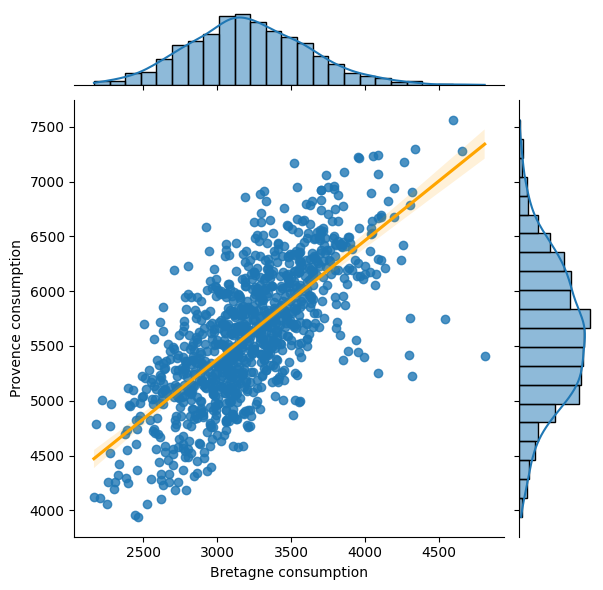

In [113]:

winter_datas = winter_data(df)

df_region_comparison = pd.DataFrame({"Bretagne consumption": winter_datas[(winter_datas.region == "Bretagne")].reset_index(drop=True).consumption,
                                     "Provence consumption": winter_datas[(winter_datas.region == "Provence-Alpes-Côte d'Azur")].reset_index(drop=True).consumption})

sns.jointplot(data=df_region_comparison, x="Bretagne consumption", y="Provence consumption", kind="reg", joint_kws={'line_kws':{'color':'orange'}})

# Calculate the correlation
correlation = df_region_comparison.corr()
print("Correlation between Bretagne and Provence consumption:")
print(correlation)
plt.show()

2. Do you think the power consumption in these two regions is independent?

Your answer: The power consumption is not independent in fact the correlation between the 2 region is $ 0.71678 $ . This is caused by the winter months, were consumptions increase almost everywhere, cause of cold weather.

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Your answer:
We define the test as follow: 
$$
H_0 : \text{Provence consumption indipendent from Bretagne consumption} , \text{ against } H_1:\text{Provence consumption dipendent from Bretagne consumption}  
$$
And we define the statistics test as:
$$
T(X,Y)=\sum_{}\frac{(O_{ij} - E_{ij})^2}{E_{ij}} = \sum_{}\frac{(N_{ij} - \frac{N_i N_j}{n})^2}{\frac{N_i N_j}{n}} \sim\chi^2((K-1)(L-1))
$$
* $ K $ and $ L $ are the number of categories in the two regions
* $ N_{ij} $ are the observed data 
* $ E_{ij} $ are the expected data, equal to the multiplication of the number of rows with the number of columns, divided by the total number.

In the end, since we have big $ n $ we will reject the null hypotesis if $ T $ test is  $ \gt \chi^2_{1-\alpha, (K-1)(L-1)} $ : the $ 1-\alpha $ quantile of a $ \chi^2 $ with $ ((K-1)(L-1)) $ degrees of freedom.

4. Give the result of this test for $\alpha=1\%$. 

In [114]:

alpha = 0.01

degrees_of_freedom = (df_region_comparison.shape[0] - 1) * (df_region_comparison.shape[1] - 1)

observed = df_region_comparison.values

row_totals = observed.sum(axis=1) #Ni
column_totals = observed.sum(axis=0) #Nj
total = observed.sum() #n

expected = np.outer(row_totals, column_totals) / total

# Calculate the chi-squared test statistic
chi2_observed = np.sum((observed - expected) ** 2 / expected)

# Determine the critical value for the chi-squared distribution
critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)

if chi2_observed > critical_value:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

print("Observed chi-squared statistic:", chi2_observed)
print("Critical value:", critical_value)
print("Result:", result)

Observed chi-squared statistic: 16442.45517172823
Critical value: 1086.9758002558094
Result: Reject the null hypothesis


## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption.

To provide a confidence interval at a $95\%$ level of confidence for the mean power consumption in this region, we calculate the following:

* $ \alpha_1 $ is the test level $ \alpha_1=1-\alpha$ .

* $ n $ is the number of data points .

* $ \bar x $ is the sample mean of the power consumption.
   
* $ V $ is the sample variance of the power consumption.


The $95\%$ confidence interval for the population mean is given by:

$$
\left( \bar x - {\sqrt{\frac{V}{n-1}}} \cdot t_{1-\alpha_1/2, n-1},\, \bar x + {\sqrt{\frac{V}{n-1}}} \cdot t_{1-\alpha_1/2, n-1} \right)
$$

Where $t_{1-\alpha_1/2, n-1}$ is the $t$-score at the $1-\alpha_1/2$ percentile with $n-1$ degrees of freedom. 


In [115]:
alpha = 0.95
alpha1 = 1-alpha

n = len(df_region_winter_2023)
x_bar = df_region_winter_2023.consumption.mean()
V = df_region_winter_2023.consumption.var()

confidence_interval = (
    x_bar - np.sqrt(V/(n-1))*t.ppf(1-alpha1/2, df=n-1), 
    x_bar + np.sqrt(V/(n-1))*t.ppf(1-alpha1/2, df=n-1)
)
# Confidence interval at level alpha = 95%
print(confidence_interval)

(3020.1635686470154, 3208.811431352985)


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In [116]:
null_mean = 3100  

# testing at level 5% is the same as finding the confidence interval region at 95% level
# Check if the null hypothesis value is within the confidence interval
if confidence_interval[0] <= null_mean <= confidence_interval[1]:
    result = "Fail to reject the null hypothesis"
else:
    result = "Reject the null hypothesis"

print("Null Hypothesis Mean:", null_mean)
print("Confidence Interval:", confidence_interval)
print("Result:", result)

Null Hypothesis Mean: 3100
Confidence Interval: (3020.1635686470154, 3208.811431352985)
Result: Fail to reject the null hypothesis
